# Car Price Prediction Project

## Problem Statement

The goal of this project is to develop a machine learning model that can predict the prices of cars based on key features such as mileage, year of manufacture, brand, and other relevant attributes.

## Data Set


This dataset contains information about used cars for sale, including the model name, year of manufacture, kilometers driven, price, and fuel type.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('used_car_dataset.csv')
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


### Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


Transform the column car_price_in_rupees to a numeric format.

In [4]:
df.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

Complete data

In [5]:
Duplicated_Value = df.duplicated().sum()
print(f'Number of duplicated rows are: = {Duplicated_Value}')

Number of duplicated rows are: = 92


In [6]:
df = df.drop_duplicates()

print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])
print('Number of Duplicate values are =', df.duplicated().sum())

Number of rows:  2013
Number of columns:  6
Number of Duplicate values are = 0


In [7]:
df['car_price_in_rupees'].value_counts()

car_price_in_rupees
₹ 4.75 Lakh    23
₹ 6.5 Lakh     20
₹ 4.5 Lakh     18
₹ 4.25 Lakh    18
₹ 6.75 Lakh    18
               ..
₹ 3.78 Lakh     1
₹ 6.18 Lakh     1
₹ 7.23 Lakh     1
₹ 66 Lakh       1
₹ 8.76 Lakh     1
Name: count, Length: 811, dtype: int64

In [8]:
import re

def preprocess_string(s):
    s = re.sub(r'[^\d.]', '', s)
    return float(s)

In [9]:
df.loc[:, 'car_price_in_rupees'] = df['car_price_in_rupees'].apply(preprocess_string)
df.loc[:, 'kms_driven'] = df['kms_driven'].apply(preprocess_string).astype(int)
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],12.0,11193,Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,3.6,42158,Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,22.0,68862,Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,8.38,37622,Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,6.75,64726,Petrol,Mumbai,2017


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   object
 1   car_price_in_rupees  2013 non-null   object
 2   kms_driven           2013 non-null   object
 3   fuel_type            2013 non-null   object
 4   city                 2013 non-null   object
 5   year_of_manufacture  2013 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 110.1+ KB


### Data CLeaning for fuel_Type

In [11]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [12]:
df['fuel_type'].value_counts()

fuel_type
Petrol        1283
Diesel         613
CNG             79
Petrol + 1      18
Electric         9
Diesel + 1       7
Hybrid           2
LPG              2
Name: count, dtype: int64

<Axes: xlabel='fuel_type', ylabel='Count'>

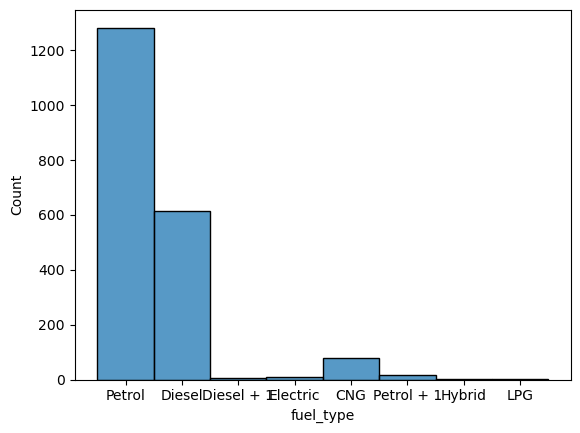

In [13]:
import seaborn as sns

sns.histplot(df['fuel_type'])

In [14]:
df.loc[df['fuel_type'] == 'Diesel + 1', 'fuel_type'] = 'Diesel'

In [15]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Petrol + 1', 'Hybrid',
       'LPG'], dtype=object)

In [16]:
df.loc[df['fuel_type'] == 'Petrol + 1', 'fuel_type'] = 'Petrol'

In [17]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Electric', 'CNG', 'Hybrid', 'LPG'],
      dtype=object)

In [18]:
# Eliminate Hybrid y LPG
df = df.drop(df[(df.fuel_type == 'Hybrid')].index)
df = df.drop(df[(df.fuel_type == 'LPG')].index)

In [19]:
# Combining both electric and CNG in to alternative_eco_fuel
df['fuel_type'] = df['fuel_type'].replace(['Electric', 'CNG'], 'alternative_eco_fuel')

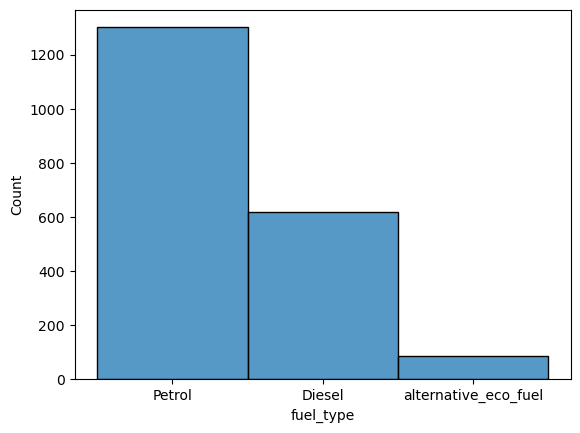

In [20]:
sns.histplot(df['fuel_type']);

 ### Data Cleaning for car_name

In [21]:
df.insert(1, 'car_brand', df['car_name'].str.split(" ").str[0])
df.car_brand.unique()

array(['Hyundai', 'Maruti', 'Tata', 'Jeep', 'Toyota', 'Renault',
       'Chevrolet', 'Mercedes-Benz', 'Ford', 'Porsche', 'Kia', 'BMW',
       'Honda', 'Audi', 'MG', 'Skoda', 'Volkswagen', 'Volvo', 'Mahindra',
       'Nissan', 'Land', 'Isuzu', 'Jaguar', 'MINI', 'Datsun', 'Fiat',
       'Citroen', 'Bentley'], dtype=object)

In [22]:
df.head()

,car_name,car_brand,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,4.45,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,Maruti,2.93,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,Tata,22.49,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,Maruti,6.95,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,12.0,11193,Petrol,Kolkata,2019


In [23]:
# Encoding "fuel_type"
df = pd.get_dummies(df, columns=['fuel_type'], prefix='fuel', dtype=int)

# Encoding "car_brand"
frequency = df["car_brand"].value_counts(normalize=True)
df["car_encoded"] = df["car_brand"].map(frequency)

In [24]:
df.head()

,car_name,car_brand,car_price_in_rupees,kms_driven,city,year_of_manufacture,fuel_Diesel,fuel_Petrol,fuel_alternative_eco_fuel,car_encoded
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,Hyundai,4.45,22402,Mumbai,2016,0,1,0,0.206570
1,Maruti Suzuki Alto 800 Lxi,Maruti,2.93,10344,Kolkata,2019,0,1,0,0.268293
2,Tata Safari XZ Plus New,Tata,22.49,12999,Bangalore,2021,1,0,0,0.040319
3,Maruti Suzuki Ciaz ZXI+,Maruti,6.95,45000,Thane,2016,0,1,0,0.268293
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],Jeep,12.0,11193,Kolkata,2019,0,1,0,0.012942


In [25]:
df.rename(columns={'car_encoded': 'car_brand_score'}, inplace=True)

In [26]:
df.drop(columns=['car_name', 'car_brand'], inplace=True)

In [27]:
df.head()

,car_price_in_rupees,kms_driven,city,year_of_manufacture,fuel_Diesel,fuel_Petrol,fuel_alternative_eco_fuel,car_brand_score
0,4.45,22402,Mumbai,2016,0,1,0,0.206570
1,2.93,10344,Kolkata,2019,0,1,0,0.268293
2,22.49,12999,Bangalore,2021,1,0,0,0.040319
3,6.95,45000,Thane,2016,0,1,0,0.268293
4,12.0,11193,Kolkata,2019,0,1,0,0.012942


### Data Cleaning for "year_of_manufacture"

In [28]:
df['car_age'] = 2024 - df['year_of_manufacture']
df.drop(columns=['year_of_manufacture'], inplace=True)
df.head()

,car_price_in_rupees,kms_driven,city,fuel_Diesel,fuel_Petrol,fuel_alternative_eco_fuel,car_brand_score,car_age
0,4.45,22402,Mumbai,0,1,0,0.206570,8
1,2.93,10344,Kolkata,0,1,0,0.268293,5
2,22.49,12999,Bangalore,1,0,0,0.040319,3
3,6.95,45000,Thane,0,1,0,0.268293,8
4,12.0,11193,Kolkata,0,1,0,0.012942,5


In [29]:
# Reordering the columns
df = df[['car_brand_score', 'kms_driven', 'fuel_Diesel', 'fuel_Petrol', 'fuel_alternative_eco_fuel', 'city', 'car_age', 'car_price_in_rupees']]

In [30]:
df.drop(columns=['city'], inplace=True)
df.head()

,car_brand_score,kms_driven,fuel_Diesel,fuel_Petrol,fuel_alternative_eco_fuel,car_age,car_price_in_rupees
0,0.206570,22402,0,1,0,8,4.45
1,0.268293,10344,0,1,0,5,2.93
2,0.040319,12999,1,0,0,3,22.49
3,0.268293,45000,0,1,0,8,6.95
4,0.012942,11193,0,1,0,5,12.0


### Handling Outliers

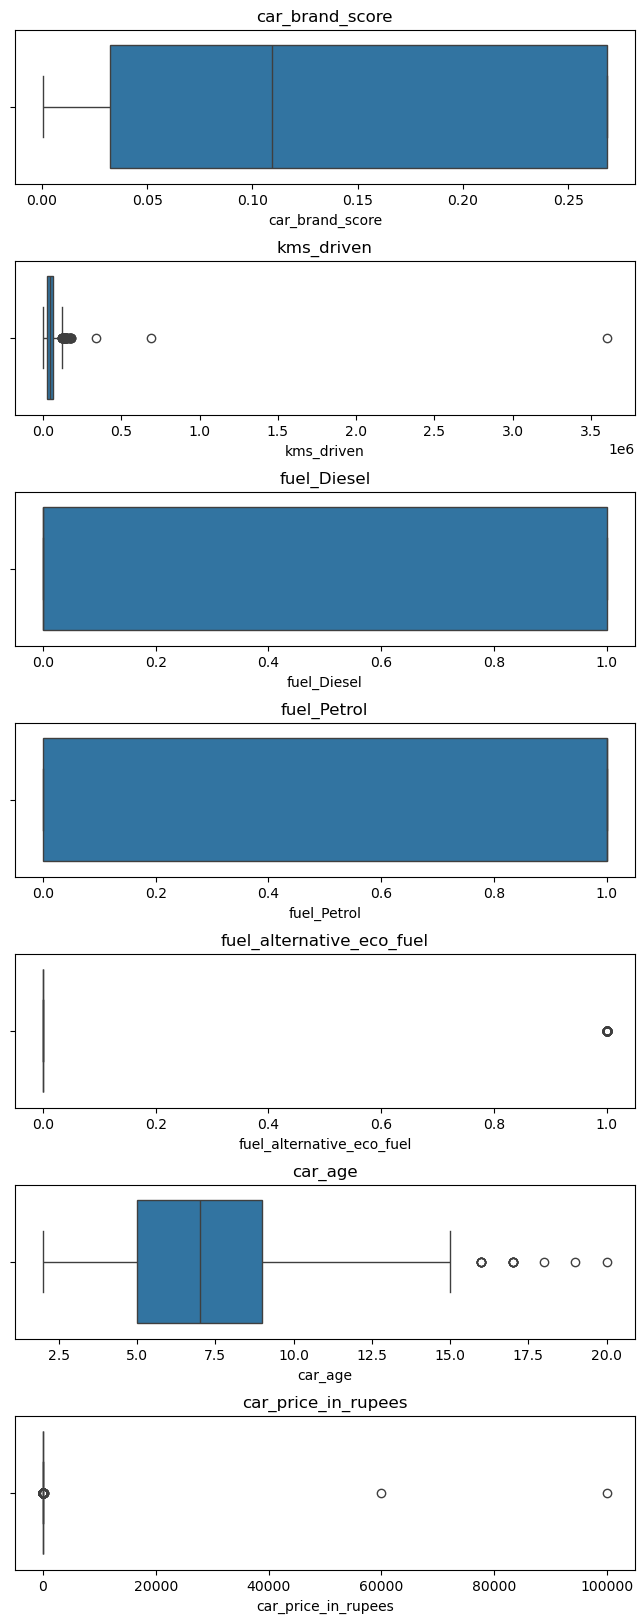

In [31]:
fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

Shape before filtering: (2009, 7)
Shape after filtering: (1665, 7)


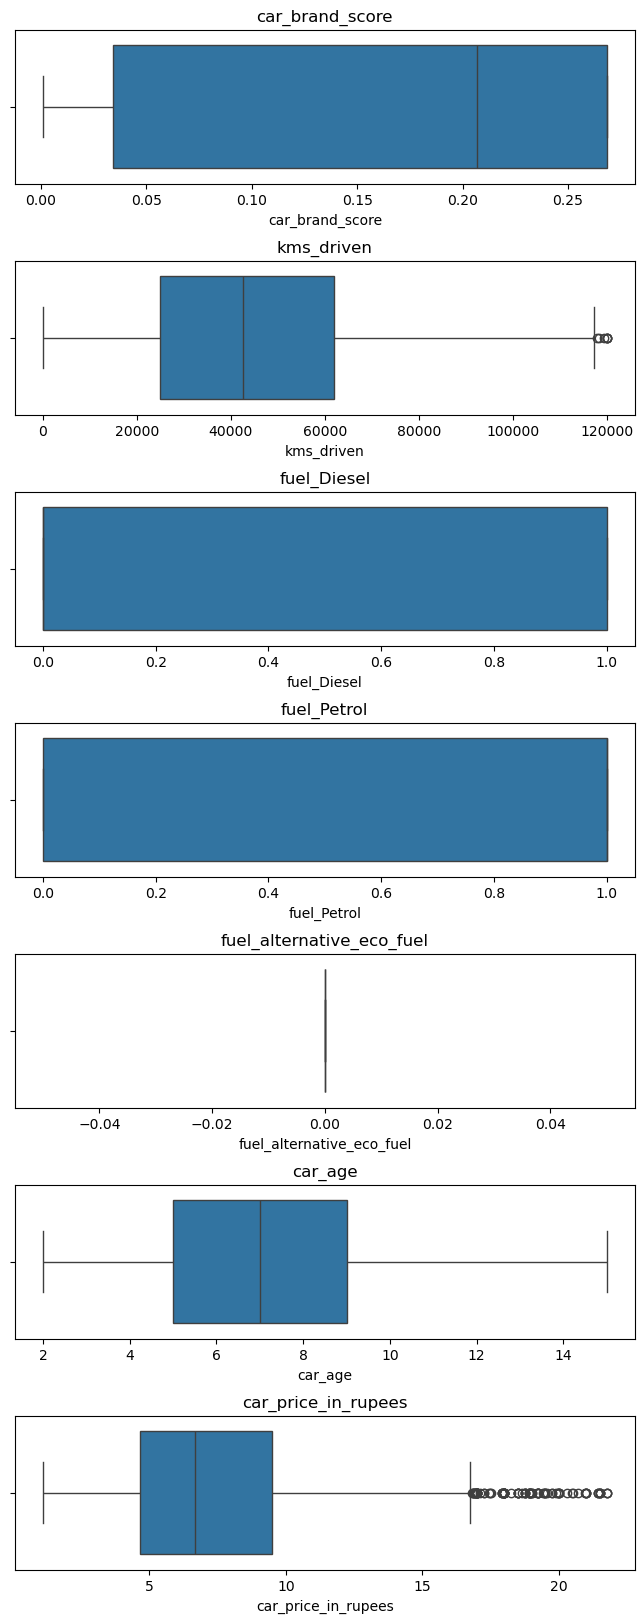

In [32]:
# Filter outliers for each column
df_filtered = df.copy()
for col in df_filtered:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    df_filtered = df_filtered[(df_filtered[col] >= Q1 - 1.5 * IQR) & (df_filtered[col] <= Q3 + 1.5 * IQR)]

print(f"Shape before filtering: {df.shape}")
print(f"Shape after filtering: {df_filtered.shape}")

fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8, 20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df_filtered):
    sns.boxplot(x=col, data=df_filtered, ax=ax[i])
    ax[i].set_title(col)

### Regression Tree Training

In [34]:
from sklearn.model_selection import train_test_split

x = df_filtered.iloc[:,:-1]
y = df_filtered.iloc[:,-1]

x_trvl, x_ts, y_trvl, y_ts = train_test_split(x, y,
                                             test_size=0.25,
                                             random_state=123)

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

tree = DecisionTreeRegressor()
tree.fit(x_trvl, y_trvl)

# Training
y_pred = tree.predict(x_trvl)
rmse = root_mean_squared_error(y_trvl, y_pred)
print("RMSE training: ", rmse)

# Testing
y_pred = tree.predict(x_ts)
rmse = root_mean_squared_error(y_ts, y_pred)
print("RMSE testing: ", rmse)

RMSE training:  0.10797914239475923
RMSE testing:  3.8835221673708045


In [42]:
print('depth: ', tree.get_depth())
print('Number of leaves: ', tree.get_n_leaves())
print('Parameters: ', tree.get_params())

depth:  24
Number of leaves:  1227
Parameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


### Hyperparameter Tuning

In [37]:
import numpy as np

hparameters = {'criterion':['squared_error','absolute_error'],
               'max_depth':np.arange(5,21,5).tolist(),
               'min_samples_split': np.arange(3,8,2).tolist(),
               'max_leaf_nodes':np.arange(100,501,100).tolist()
               }
hparameters

{'criterion': ['squared_error', 'absolute_error'],
 'max_depth': [5, 10, 15, 20],
 'min_samples_split': [3, 5, 7],
 'max_leaf_nodes': [100, 200, 300, 400, 500]}

In [38]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeRegressor(random_state=123), param_grid = hparameters, cv = 5, n_jobs =-1, verbose=1 )

In [39]:
gs.fit(x_trvl,y_trvl)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [100, 200, 300, 400, 500],
                         'min_samples_split': [3, 5, 7]},
             verbose=1)

In [40]:
best_params = gs.best_params_
best_params

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_leaf_nodes': 100,
 'min_samples_split': 3}

In [41]:
best_tree = gs.best_estimator_

In [44]:
best_tree.get_n_leaves()

100

In [46]:
tree = DecisionTreeRegressor()
tree.fit(x_trvl, y_trvl)

# Training
y_pred = best_tree.predict(x_trvl)
rmse = root_mean_squared_error(y_trvl, y_pred)
print("RMSE training: ", rmse)

# Testing
y_pred = best_tree.predict(x_ts)
rmse = root_mean_squared_error(y_ts, y_pred)
print("RMSE testing: ", rmse)

RMSE training:  2.040639011714662
RMSE testing:  3.4087576884466873


In [64]:
important_features = pd.Series(best_tree.feature_importances_, index=x_trvl.columns).sort_values(ascending=False)
important_features

car_brand_score              0.530038
car_age                      0.254121
kms_driven                   0.111964
fuel_Petrol                  0.061277
fuel_Diesel                  0.042600
fuel_alternative_eco_fuel    0.000000
dtype: float64

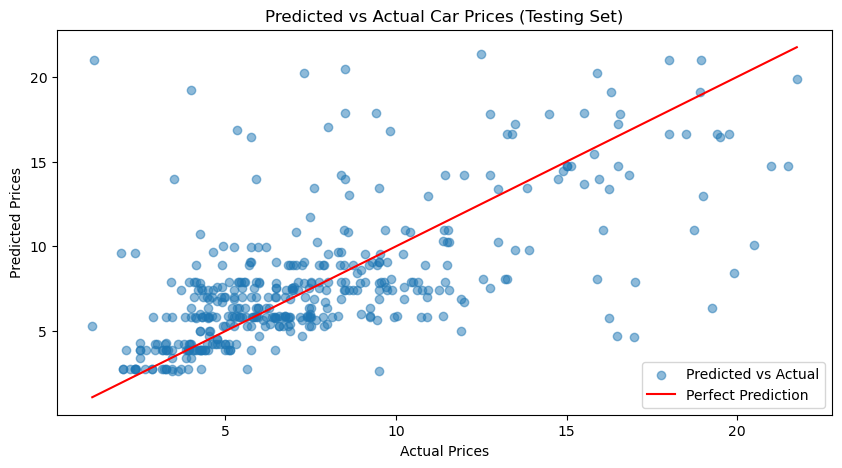

In [47]:

# Predictions
y_pred_train = best_tree.predict(x_trvl)
y_pred_test = best_tree.predict(x_ts)

# Graph for the test set
plt.figure(figsize=(10, 5))
plt.scatter(y_ts, y_pred_test, alpha=0.5, label="Predicted vs Current")
plt.plot([min(y_ts), max(y_ts)], [min(y_ts), max(y_ts)], color="red", label="Perfect Prediction")
plt.xlabel("Current Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Current Car Prices (Testing Set)")
plt.legend()
plt.show()

The regression tree model developed is capable of accurately predicting car prices, achieving a competitive RMSE of 3.41 on the test set. During the process, several advanced techniques were implemented to optimize the model and ensure data quality:

- **Data Cleaning and Outlier Handling**: Outliers were identified and addressed using methods based on the Interquartile Range (IQR), which improved the model's stability.

- **Hyperparameter Tuning with GridSearchCV**: Initially, the model trained without hyperparameter tuning showed an RMSE of 0.108 on the training set and 3.88 on the test set, indicating overfitting. After applying GridSearchCV, the decision tree's hyperparameters were optimized, achieving an RMSE of 2.04 on the training set and 3.41 on the test set, reflecting a balance between bias and variance.

- **Model Interpretability**: A feature importance analysis was conducted, identifying the key variables that influence car prices.


These results demonstrate a solid and structured approach to model building, leveraging preprocessing techniques, parameter optimization and validation.